<h3><span style="color:Blue">
Online Retail Dataset
</span></h3> 

<h3><span style="color:Green">
Overview
</span></h3> 

The Online Retail dataset provides insights into the sales activities of an online store spanning from December 1, 2009, to December 9, 2011. This dataset encompasses a wide range of souvenir products, primarily targeting corporate customers.

<h3><span style="color:Green">
Objective
</span></h3> 

<h4>1.How does our monthly revenue trend look?<br><br>
    2.Which products contribute the most to our revenue?<br><br>
    3.What are the top-selling products in each country based on revenue?<br><br>
    4.How do our sales vary across different countries?<br><br>
    5.What is the monthly customer retention rate?<br><br>
    6.Customer segmentation( RFM analysis):RFM analysis is a customer segmentation technique that evaluates customer behavior based on three key factors:

Recency (how recently a customer made a purchase)
Frequency (how often a customer makes purchases)
Monetary Value (the total amount a customer has spent).<br><br>

### Variables Description
<h4>This section provides a comprehensive overview of the variables in the Online Retail - II dataset:<br><br>
    a.InvoiceNo: A unique identifier for each transaction. Transactions prefixed with "C" indicate refunds.<br><br>
    b.StockCode: A distinct code assigned to each inventory item.<br><br>
    c.Description: The name of the item purchased.<br><br>
    d.Quantity: The number of items in the transaction.<br><br>
    e.InvoiceDate: The date and time when the transaction took place.<br><br>
    f.Price: The price per item in Sterling.<br><br>
    g.CustomerID: A unique identifier for each customer.<br><br>
    h.Country: The customers country of residence.<br><br>
    
   

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the datasets
C_items = pd.read_excel("customer_transactions_sample (1).xlsx", sheet_name= "Year 2009-2010")

In [3]:
# Read the datasets
C_items1 = pd.read_excel("customer_transactions_sample (1).xlsx", sheet_name= "Year 2010-2011")

In [4]:
C_items.shape

(525461, 8)

In [5]:
C_items1.shape

(541910, 8)

In [6]:
C_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [7]:
C_items1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


<h3><span style="color:green">
Data Preparation
</span></h3> 

### Table of Contents

   <h4>  a. Data Import.<br><br>
         b. Data Exploration and Cleaning:<br><br>
               1. Checking null values<br><br>
               2. Duplicate values<br><br>
               3. Cleaning records with zero Price <br><br>
               4. Removing cancelled purchases.<br><br>
    

In [8]:
# Check for missing values in each column
C_items.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [9]:
# Check for Duplicate Values in each column
C_items[C_items.duplicated()] 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
371,489517,21912,VINTAGE SNAKES & LADDERS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
383,489517,22130,PARTY CONE CHRISTMAS DECORATION,6,2009-12-01 11:34:00,0.85,16329.0,United Kingdom
384,489517,22319,HAIRCLIPS FORTIES FABRIC ASSORTED,12,2009-12-01 11:34:00,0.65,16329.0,United Kingdom
385,489517,21913,VINTAGE SEASIDE JIGSAW PUZZLES,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
386,489517,21821,GLITTER STAR GARLAND WITH BELLS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
...,...,...,...,...,...,...,...,...
523258,538035,20728,LUNCH BAG CARS BLUE,3,2010-12-09 13:03:00,1.65,16065.0,United Kingdom
523356,538051,22659,LUNCH BOX I LOVE LONDON,2,2010-12-09 13:24:00,1.95,18041.0,United Kingdom
525170,538155,21907,I'M ON HOLIDAY METAL SIGN,1,2010-12-09 16:52:00,2.10,16907.0,United Kingdom
525293,538166,21915,RED HARMONICA IN BOX,5,2010-12-09 18:09:00,1.25,17965.0,United Kingdom


In [49]:
# Canceled invoices start with the letter C. 
C_items['Invoice'] = C_items['Invoice'].astype(str)
df_refunded = C_items[C_items['Invoice'].str.contains('C')]

df_refunded.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia


In [53]:
# Canceled invoices start with the letter C. 
# The reason why the Quantity value is negative is that these refunded invoices are the sum of the refunded charges.

df_refunded.shape

(9816, 8)

In [54]:
# Analyze the products with a sale price of 0 and remove these records as well.
# Boolean indexing
df_ZeroPrice = C_items[C_items['Price'] == 0]
df_ZeroPrice.shape

(31, 8)

In [10]:
# Dropping duplicated rows
C_items.drop_duplicates(inplace=True)

In [11]:
#drop rows with missing CustomerID
C_items.dropna(subset=['Customer ID'], inplace=True)

In [12]:
C_items.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


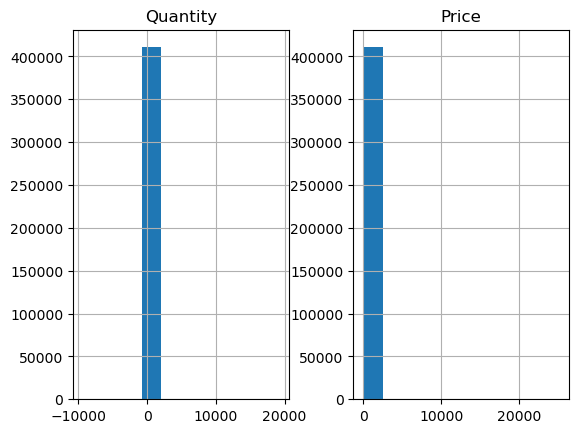

In [13]:
# Visualize histograms
C_items.hist(column=['Quantity', 'Price'])
plt.show()

In [14]:
# Check for negative values in Price column

negative_count = (C_items['Price'] < 0).sum()
print(f"Number of negative values in the 'Price' column: {negative_count}")

Number of negative values in the 'Price' column: 0


In [15]:
# Check for negative values in Quantity column

negative_count = (C_items['Quantity'] < 0).sum()
print(f"Number of negative values in the 'Quantity' column: {negative_count}")

Number of negative values in the 'Quantity' column: 9816


In [16]:
C_items.shape

(410763, 8)

In [17]:
# Filter out rows with negative quantities
df = C_items[C_items['Quantity'] >= 0]

In [18]:
df.shape

(400947, 8)

In [ ]:
# Delete rows without customer ID. Because we will make an analysis over customers.
# We also delete product information with empty rows under 1%. 
# We aim to get healthy results in product-based analysis. 

In [47]:

df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,400947.0,13.768523,1.0,2.0,5.0,12.0,19152.0,97.639816
InvoiceDate,400947,2010-07-01 04:56:11.466452992,2009-12-01 07:45:00,2010-03-26 13:13:00,2010-07-09 10:26:00,2010-10-14 13:57:00,2010-12-09 20:01:00,NaN
Price,400947.0,3.305571,0.0,1.25,1.95,3.75,10953.5,35.046376
Customer ID,400947.0,15361.454639,12346.0,13985.0,15311.0,16805.0,18287.0,1680.669487


In [48]:
df['Invoice'] = df['Invoice'].astype(str)
df_refunded = df[df['Invoice'].str.contains('C')]

df_refunded.head()

C:\Users\Imart\AppData\Local\Temp\ipykernel_2648\3324908923.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Invoice'] = df['Invoice'].astype(str)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [56]:
df_ZeroPrice = df[df['Price'] == 0]
df_ZeroPrice.shape

(31, 8)

In [19]:
df['StockCode'] = df['StockCode'].astype(str)
# Fill NaNs with empty strings
df['StockCode'] = df['StockCode'].fillna('')

# Calculate the maximum length of the strings in the StockCode column
max_length = df['StockCode'].str.len().max()

print(max_length)

C:\Users\Imart\AppData\Local\Temp\ipykernel_2648\2774911872.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['StockCode'] = df['StockCode'].astype(str)
C:\Users\Imart\AppData\Local\Temp\ipykernel_2648\2774911872.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['StockCode'] = df['StockCode'].fillna('')


12


In [20]:
df['Invoice'] = df['Invoice'].astype(str)
# Fill NaNs with empty strings
df['Invoice'] = df['Invoice'].fillna('')

# Calculate the maximum length of the strings in the StockCode column
max_length = df['Invoice'].str.len().max()

print(max_length)

C:\Users\Imart\AppData\Local\Temp\ipykernel_2648\1118984402.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Invoice'] = df['Invoice'].astype(str)
C:\Users\Imart\AppData\Local\Temp\ipykernel_2648\1118984402.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Invoice'] = df['Invoice'].fillna('')


6


In [21]:
max(df.Description.dropna().str.len())

35

In [22]:
max(df.Country.dropna().str.len())

20

In [23]:
# Check for missing values in each column
C_items1.isnull().sum()

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64

In [25]:
C_items1[C_items1.duplicated()] 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [26]:
# Dropping duplicated rows
C_items1.drop_duplicates(inplace=True)

In [27]:
#drop rows with missing CustomerID
C_items1.dropna(subset=['Customer ID'], inplace=True)

In [28]:
C_items1.shape

(401605, 8)

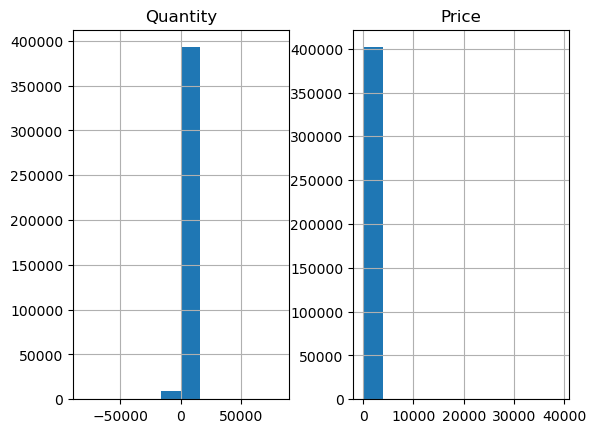

In [30]:
# Visualize histograms
C_items1.hist(column=['Quantity', 'Price'])
plt.show()

In [31]:
negative_count = (C_items1['Price'] < 0).sum()
print(f"Number of negative values in the 'Price' column: {negative_count}")

Number of negative values in the 'Price' column: 0


In [32]:
negative_count = (C_items1['Quantity'] < 0).sum()
print(f"Number of negative values in the 'Quantity' column: {negative_count}")

Number of negative values in the 'Quantity' column: 8872


In [34]:
# Filter out rows with negative quantities
df1 = C_items1[C_items1['Quantity'] >= 0]

In [35]:
df1.shape

(392733, 8)

In [57]:
df1['Invoice'] = df1['Invoice'].astype(str)
df_refunded = df1[df1['Invoice'].str.contains('C')]

df_refunded.head()

C:\Users\Imart\AppData\Local\Temp\ipykernel_2648\2548396305.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Invoice'] = df1['Invoice'].astype(str)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [58]:
# Analyze the products with a sale price of 0 and remove these records as well.
# Boolean indexing
df_ZeroPrice = df1[df1['Price'] == 0]
df_ZeroPrice.shape

(40, 8)

In [36]:
df1['StockCode'] = df1['StockCode'].astype(str)
# Fill NaNs with empty strings
df1['StockCode'] = df1['StockCode'].fillna('')

# Calculate the maximum length of the strings in the StockCode column
max_length = df1['StockCode'].str.len().max()

print(max_length)

C:\Users\Imart\AppData\Local\Temp\ipykernel_2648\1816238351.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['StockCode'] = df1['StockCode'].astype(str)
C:\Users\Imart\AppData\Local\Temp\ipykernel_2648\1816238351.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['StockCode'] = df1['StockCode'].fillna('')


12


In [37]:
df1['Invoice'] = df1['Invoice'].astype(str)
# Fill NaNs with empty strings
df1['Invoice'] = df1['Invoice'].fillna('')

# Calculate the maximum length of the strings in the StockCode column
max_length = df1['Invoice'].str.len().max()

print(max_length)

C:\Users\Imart\AppData\Local\Temp\ipykernel_2648\902172372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Invoice'] = df1['Invoice'].astype(str)
C:\Users\Imart\AppData\Local\Temp\ipykernel_2648\902172372.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Invoice'] = df1['Invoice'].fillna('')


6


In [38]:
max(df1.Description.dropna().str.len())

35

In [39]:
max(df1.Country.dropna().str.len())

20

In [40]:
pip install sqlalchemy

Note: you may need to restart the kernel to use updated packages.


In [41]:
import sqlalchemy as sal

In [42]:
engine = sal.create_engine('mssql://DESKTOP-SSGVBEG\SQLEXPRESS/master?driver=ODBC+DRIVER+17+FOR+SQL+SERVER')
conn=engine.connect()

In [43]:
#Load the data in sql server
df.to_sql('df_order_2009_2010',con=conn,index=True,if_exists='replace')

-1

In [44]:
#Load the data in sql server
df1.to_sql('df_order_2010_2011',con=conn,index=True,if_exists='replace')

-1

In [45]:
df.to_sql('df_order_2009_2010',con=conn,index=False,if_exists='append')

-1

In [46]:
df1.to_sql('df_order_2010_2011',con=conn,index=False,if_exists='append')

-1